In [1]:
import pandas as pd
import numpy as np
import re

# Understanding PAH Property Estimation

This document provides an overview of the Python functions used to estimate the physical and chemical properties of polycyclic aromatic hydrocarbons (PAHs), specifically cyanonaphthalene. The code avoids using vibrational frequency data from the AmesPAHdb database and focuses on analytical estimates derived from Chapter 6 of The Physics and Chemistry of the Interstellar Medium by A. G. G. M. Tielens

---

## Function Reference

### `approx_surface_area_pah(Nc)`

Estimates the surface area of a PAH molecule.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms in the molecule.  
- **Returns**:  
  `float` – Surface area in cm².

---

### `approx_radius_pah(Nc)`

Estimates the effective radius of a PAH molecule.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
- **Returns**:  
  `float` – Radius in cm.

---

### `FUV_absorption_cross_section(Nc)`

Estimates the far-ultraviolet (FUV) absorption cross section of a PAH.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
- **Returns**:  
  `float` – FUV cross section in cm².

---

### `UV_absorption_timescale(Nc, G0)`

Estimates the timescale for UV absorption by a PAH in the interstellar medium.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
  `G0` (*float*): Habing field scaling factor (UV field strength in ISM).  
- **Returns**:  
  `float` – Absorption timescale in seconds.

---

### `vibrational_degrees_of_freedom(Na)`

Computes the number of vibrational degrees of freedom in a non-linear PAH molecule.

- **Parameters**:  
  `Na` (*int*): Total number of atoms in the molecule.  
- **Returns**:  
  `int` – Number of vibrational modes.

---

### `ionization_potential(Z, Nc)`

Estimates the ionization potential of a PAH molecule.

- **Context**:  
  PAHs with ionization potentials above 13.6 eV cannot be ionized by typical interstellar UV photons due to the hydrogen absorption cutoff.

- **Parameters**:  
  `Z` (*int*): Charge of the molecule.  
  `Nc` (*int*): Number of carbon atoms.  
- **Returns**:  
  `float` – Ionization potential in eV.

---

### `photo_el_ionization_rate(Nc, G0, fy)`

Estimates the rate of photo-electron ionization rate for a PAH.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
  `G0` (*float*): Habing field.  
  `fy` (*float*): Photo-electron yield enhancement factor.  
- **Returns**:  
  `float` – Ionization rate in electrons per second.

> **Note:** This function relies on a global variable `lab_IP` (laboratory ionization potential of 1-cyanonaphthalene from the NIST database). For better accuracy, it is recommended to pass `lab_IP` as an argument.

---

### `neutral_fraction(Nc, G0, T_ISM, J_Er, J_Pe, ne)`

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
  `G0` (*float*): Habing field.  
  `T_ISM` (*float*): The temperature of the diffuse interstellar medium
  `J_Pe` (*float*): Photo-electron ionization rate
  `J_Er` (*float*): Electron recombination rate
  `ne` (*int*): Electron density of given astrophysical region
- **Returns**:  
  `float` – Fraction of neutral to ionized PAH molecules

---

### Constants Used for Cyanonaphthalene

These parameter values are used for test calculations with the molecule *1-cyanonaphthalene*:

| Parameter | Description                                        | Value       |
|----------:|----------------------------------------------------|-------------|
| `Na`      | Total number of atoms                              | 19          |
| `Nc`      | Number of carbon atoms                             | 11          |
| `G0`      | Habing field (diffuse ISM)                         | 1.7         |
| `lab_IP`  | Laboratory ionization potential of cyanonaphthalene | 8.6 eV      |
| `fy`      | Yield enhancement factor for small PAHs            | 10          |
| `J_er`    | Electron recombination rate coefficient at 300K            | 1.5 × 10⁻7 cm³ s⁻¹ |
| `T_ISM`    | Temperature estimate of diffuse ISM           | 80 K |
| `ne`    | Electron density of diffuse ISM          | 7.5 × 10⁻3 cm³ |

In [32]:
# PAH FUNCTIONS
def approx_surface_area_pah(Nc): 
    s_area = 5 * 10**(-16) * Nc
    return s_area

def approx_radius_pah(Nc):
    a = 0.9 * 10**(-8) * np.sqrt(Nc)
    return a

def FUV_absorption_cross_section(Nc):
    sigma = 7 * 10**(-18) * Nc
    return sigma

def UV_absorption_timescale(Nc,G0):
    t_UV = 1.4 * 10**(9) / (Nc*G0)
    return t_UV

def vibrational_degrees_of_freedom(Na):
    return 3*Na - 6

def ionization_potential(Z, Nc):
    IP = 4.4 + (Z + 0.5) * 25.1/np.sqrt(Nc)
    return IP

def photo_el_ionization_rate(Nc, G0, fy):
    J_pe = 2.5 * 10**(-13) * (13.6-lab_IP)**2 * Nc * G0 * fy
    return J_pe

def neutral_fraction(Nc, G0, T_ISM, J_Er, J_Pe, ne):
    # y0 = (J_Pe / J_Er) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    # y1 = 3.5 * 10**(-6) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    # y2 = 1.3 * 10**(-4) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    y4 = (J_Pe / J_Er * ne) 
    #factor = (J_Pe / J_Er) 
    f0 = 1/(1 + y4)
    return f0

# CONSTANTS
Na = 19                
Nc = 11               
G0 = 1.7              
lab_IP = 8.6          
fy = 10              
J_Er = 1.5 * 10**(-7)
T_ISM = 80
ne = 7.5 * 10**(-3)

# CALCULATIONS
print("Vibrational degrees of freedom:", vibrational_degrees_of_freedom(Na))
print("Surface area:", approx_surface_area_pah(Nc), "cm^2")
print("Radius:", approx_radius_pah(Nc), "cm")
print("FUV cross section:", FUV_absorption_cross_section(Nc), "cm^2")

t_UV = UV_absorption_timescale(Nc, G0)
print("UV absorption timescale:", t_UV, "seconds", "which is equivalent to ", t_UV / 3.154e7, "years")

print("Ionization potential (Z=0):", ionization_potential(0, Nc), "eV", "and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV")
print("Ionization potential (Z=1):", ionization_potential(1, Nc), "eV")

print("Photoelectron ionization rate:", photo_el_ionization_rate(Nc, G0, fy), "electrons s^-1")
print("Neutral fraction:", neutral_fraction(Nc, G0, T_ISM, J_Er, photo_el_ionization_rate(Nc, G0, fy), ne), "which is the ratio of neutral to ionized PAHs")

Vibrational degrees of freedom: 51
Surface area: 5.5e-15 cm^2
Radius: 2.98496231131986e-08 cm
FUV cross section: 7.7e-17 cm^2
UV absorption timescale: 74866310.16042781 seconds which is equivalent to  2.3736940444016428 years
Ionization potential (Z=0): 8.183967374450933 eV and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV
Ionization potential (Z=1): 15.751902123352803 eV
Photoelectron ionization rate: 1.1687500000000001e-09 electrons s^-1
Neutral fraction: 0.9999415659147419 which is the ratio of neutral to ionized PAHs


### Calculating the unimolecular dissociation rate

In the case of cyanonapthalene, the most likely bond to break in the molecule would be the -CN bond as given by the reaction here:
C10H7CN+ → C10H6+ + HCN + ϵ (where ϵ is the kinetic energy)

In [42]:
# WAVENUMBER DATA
neutral1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
cation1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()
transition_neutral1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\transition_strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
transition_cation1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\transition_strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()

# CONSTANTS
c_cm = 2.99792458e10  # Speed of light in cm/s, since cm_freq is given in cm^-1
h = 6.62607015e-34 # Planck's constant in J/Hz
h_eV = 4.135667696e-15 # Planck's constant in eV/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
k_B_eV = 8.617333262145e-5 # Boltzmann's constant in eV/K
R_gas = 8.31446261815324 # Ideal gas constant in J/(mol*K)
q_vib_total = 1
amu_to_kg = 1.66053906660e-27  
angstrom_to_m = 1e-10          
inertia_factor = amu_to_kg * angstrom_to_m**2 
neutral1cyano_principal_moments = [341.37767327 * inertia_factor, 532.72832397 * inertia_factor, 874.10599724 * inertia_factor] # Principal moments of inertia in kg*m^2
cation1cyano_principal_moments = [341.39046846 * inertia_factor, 535.88368599 * inertia_factor, 877.27415445 * inertia_factor]
symmetry_number = 1 # 1-cyanonaphthalene is structurally asymmetric (also seen in principal moment inertias), so the symmetry number is 1. Also given in sigma notation
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.
FUV_photon_frequency = 1.0e15 # Frequency of FUV photons in Hz, assuming a wavelength of 100 nm (1e-7 m) for the calculation
Kcal_mol_to_eV = 0.0433634 # Conversion factor from kcal/mol to eV
neutral1cyano_zero_point_energy = 92.957 * Kcal_mol_to_eV # Zero-point energy in eV, given in kcal/mol found on astrochemistry.org UID = 465
cation1cyano_zero_point_energy = 92.51 * Kcal_mol_to_eV # Zero-point energy in eV, given in kcal/mol found on astrochemistry.org UID = 466
bond_energy = 3.16 # The dissocation/activation energy of the HCN bond of cyanonaphthalene in eV, given in the paper by H. Stockett et al. (2023) DOI: 10.1038/s41557-023-01283-0.

# FUNCTIONS
def vibrational_partition_function(wavenumbers_list, T):
    q_vib_total = 1
    for cm_freq in wavenumbers_list:
        hz_freq = cm_freq * c_cm
        char_vib_temp = h * hz_freq / k_B
        q_vib = 1 / (1 - np.exp(-char_vib_temp / T))
        q_vib_total *= q_vib
    return q_vib_total

def rotational_partition_function(symmetry_number, principal_moments, T):
    return (np.pi**2 / symmetry_number) * \
           np.sqrt(8*np.pi*principal_moments[0] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[1] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[2] * k_B*T / h**2)

def compute_partition_functions(wavenumbers_list, principal_moments, T, symmetry_number=1):
    q_vib = vibrational_partition_function(wavenumbers_list, T)
    q_rot = rotational_partition_function(symmetry_number, principal_moments, T)
    return q_vib, q_rot

def d_entropy(q_vib_parent, q_rot_parent, q_vib_transition, q_rot_transition, activation_energy, T):
    delta_S = k_B_eV * np.log((q_vib_transition * q_rot_transition) / (q_vib_parent * q_rot_parent)) + ((activation_energy) / T) 
    return delta_S

def PAH_effective_temperature(light_freq, Nc, bond_energy):
    T_eff = 2000 * ((h_eV * light_freq) / Nc) ** 0.4 * (1 - 0.2 * bond_energy / (h_eV * light_freq)) # energies in eV
    return T_eff

def pre_exponential_factor(T_eff, delta_S):
    k0 = k_B * T_eff / h * np.exp(1 + delta_S / R_gas)
    return k0

def unimolecular_dissociation_rate(k0, T_eff, bond_energy):
    k_diss = k0 * np.exp(-bond_energy / (k_B * T_eff)) # energies in eV
    return k_diss

# RESULTS
q_vib_neutral, q_rot_neutral = compute_partition_functions(neutral1cyano_wavenumbers_list, neutral1cyano_principal_moments, T_eval)
q_vib_cation, q_rot_cation = compute_partition_functions(cation1cyano_wavenumbers_list, cation1cyano_principal_moments, T_eval)
q_vib_transition_neutral, q_rot_transition_neutral = compute_partition_functions(transition_neutral1cyano_wavenumbers_list, neutral1cyano_principal_moments, T_eval)
q_vib_transition_cation, q_rot_transition_cation = compute_partition_functions(transition_cation1cyano_wavenumbers_list, cation1cyano_principal_moments, T_eval)

# print(neutral1cyano_zero_point_energy)
# print(cation1cyano_zero_point_energy)
print(PAH_effective_temperature(FUV_photon_frequency, Nc, bond_energy))
print(FUV_photon_frequency * h_eV)

print(q_vib_neutral, q_rot_neutral) 
# The value for vibrational partition function is 1.0004108472935627 implies that very few vibrational states of 1-cyanonaphthalene are accessible at 80 K, 
# and thus the partition function is close to 1. 
# This means that the molecule is primarily in its ground state and that the vibrational modes are not significantly populated at this temperature. 
# The value for rotational partition function is 133805.2505900026 which is a large number, indicating that the rotational states are significantly populated at 80 K.
# Rotation is much more accessible than vibration at this temperature, 
# which is consistent with the fact that the rotational partition function is typically much larger than the vibrational partition function at low temperatures.
print(q_vib_cation, q_rot_cation)
print(q_vib_transition_neutral, q_rot_transition_neutral)
print(q_vib_transition_cation, q_rot_transition_cation)

print(d_entropy(q_vib_neutral, q_rot_neutral, q_vib_transition_neutral, q_rot_transition_neutral, bond_energy, T_eval) * 1.602e-19 * 6.022e23 / 4.184) # kcal/mol K



1145.6935000877745
4.1356676960000005
5.544077488182599 5916195.513425924
25.157890192110596 5944545.396059827
41347.15530880668 5916195.513425924
208827.7814647759 5944545.396059827
90.57918390384025


In [34]:
# Calculating RRKM Unimolecular dissocation rate with the density of states from MultiWell densum program.
activation_energy = 3.16 # The activation energy of the HCN bond of cyanonaphthalene in eV, given in the paper by H. Stockett et al. (2023) DOI: 10.1038/s41557-023-01283-0.
h = 4.135667696e-15 # Planck's constant in eV/Hz
k_RRKM_list = []

df = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\1-cyanonap_26eV.dens', 
                 skiprows=92, 
                 sep='\s+', 
                 names=["No.", "E-Emin", "Density", "Sum [Emin = 0.0 cm-1; E at TOP of energy grains]"])

density_of_states_list = df["Density"].tolist()
total_states = df.iloc[-1]["Sum [Emin = 0.0 cm-1; E at TOP of energy grains]"]

print(f"Total number of states: {total_states}")
print(density_of_states_list)

def RRKM_dissociation_rate(reaction_degen, sum_of_states, density_of_states, bond_energy):
    k_RRKM = reaction_degen * sum_of_states * bond_energy / h * density_of_states 
    return k_RRKM

for i in density_of_states_list:
    k_RRKM_rate = RRKM_dissociation_rate(1, total_states, i, activation_energy)
    k_RRKM_list.append(k_RRKM_rate)

print(k_RRKM_list)



Total number of states: 4.88949e+56
[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.0, 0.3, 0.2, 0.0, 0.3, 0.2, 0.2, 0.1, 0.5, 0.2, 0.1, 0.4, 0.4, 0.1, 0.4, 0.5, 0.3, 0.3, 0.6, 0.5, 0.3, 0.6, 0.7, 0.4, 0.5, 0.9, 0.5, 0.6, 0.9, 0.8, 0.7, 0.8, 1.3, 0.8, 0.7, 1.4, 1.2, 0.9, 1.3, 1.5, 1.3, 1.4, 1.9, 1.6, 1.2, 2.2, 1.9, 1.6, 2.1, 2.7, 2.0, 2.1, 3.0, 2.9, 2.1, 3.3, 3.3, 3.0, 3.2, 3.8, 3.9, 3.5, 4.7, 4.5, 3.6, 5.1, 5.3, 5.0, 4.8, 6.3, 6.4, 5.3, 6.7, 7.6, 6.3, 7.6, 8.3, 8.2, 8.1, 9.5, 9.7, 8.7, 10.7, 11.6, 10.4, 11.0, 13.2, 12.7, 12.5, 14.5, 15.2, 14.3, 15.7, 17.3, 16.9, 17.6, 19.7, 19.9, 19.4, 22.0, 23.0, 22.6, 23.8, 26.1, 26.7, 26.2, 29.4, 30.5, 30.2, 32.4, 35.2, 34.7, 36.0, 38.8, 41.1, 39.6, 44.2, 45.6, 46.2, 48.8, 51.8, 53.1, 53.7, 58.2, 60.9, 60.2, 65.0, 68.3, 69.2, 72.4, 76.1, 80.1, 80.4, 84.6, 90.6, 90.2, 96.4, 100.0, 103.2, 106.7, 112.3, 

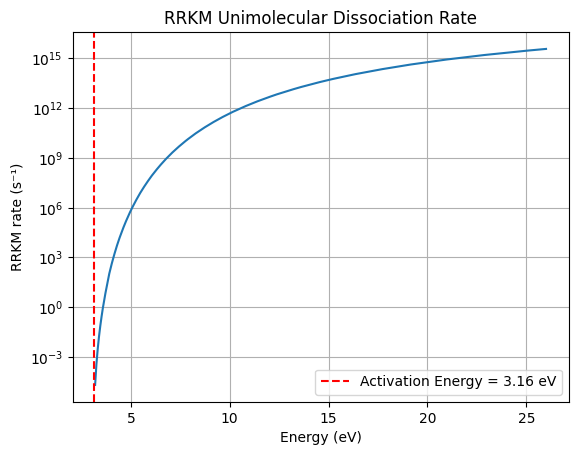

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
h_eVs = 4.135667696e-15  # Planck's constant in eV·s
Ea = 3.16  # Activation energy in eV
degeneracy = 1  # Reaction path degeneracy

# Load data
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\1-cyanonap_26eV.dens', 
    skiprows=92, 
    sep=r'\s+', 
    names=["No", "E_cm1", "Density", "Sum"]
)

# Convert cm⁻¹ to eV
df["E_eV"] = df["E_cm1"] / 8065.54

# Interpolate sum at (E - Ea)
df["E_minus_Ea"] = df["E_eV"] - Ea
df["Sum_shifted"] = np.interp(df["E_minus_Ea"], df["E_eV"], df["Sum"], left=0, right=0)

# Calculate RRKM rate
df["k_RRKM"] = (degeneracy * df["Sum_shifted"]) / (h_eVs * df["Density"])
df.loc[df["E_minus_Ea"] < 0, "k_RRKM"] = np.nan  # Invalid below threshold

# Plot
plt.plot(df["E_eV"], df["k_RRKM"])
plt.yscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("RRKM rate (s⁻¹)")
plt.title("RRKM Unimolecular Dissociation Rate")
plt.grid(True)
plt.axvline(Ea, color='red', linestyle='--', label=f"Activation Energy = {Ea} eV")
plt.legend()
plt.show()